## Mengkoneksikan Colab dengan Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Packages

> Indented block



In [ ]:
# Import Packages
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Setting Path & Check Directory

In [ ]:
# Load the data
path_data = '/content/gdrive/My Drive/Summer Class/meet 10/'

# Check Directory
os.listdir(path_data)

['customer.csv',
 'online_retail_II.xlsx',
 'product.csv',
 'sales reciepts.csv',
 'customer_clean.csv',
 'transaction_clean.csv',
 'product_clean.csv']

## Import Data

lakukan import data customer_clean.csv, transaction_clean.csv, product_clean.csv

In [ ]:
# Membaca dataset
df_cust = pd.read_csv(path_data + 'customer_clean.csv')
df_trx = pd.read_csv(path_data + 'transaction_clean.csv')
df_prod = pd.read_csv(path_data + 'product_clean.csv')

# Case 1

Home store mana yang banyak mendapatkan customer?

In [ ]:
df_cust_homestore = df_cust.groupby('home_store')['customer_id'].count().sort_values(ascending = False).reset_index()
df_cust_homestore.rename(columns={'customer_id':'jumlah customer'}, inplace=True)

In [ ]:
df_cust_homestore

,home_store,jumlah customer
0,5,945
1,3,800
2,8,501


# Case 2

Distribusi umur dari masing-masing home store menggunakan boxplot  

In [ ]:
# Cek Tipe Data
df_cust.dtypes

Unnamed: 0              int64
customer_id             int64
home_store              int64
customer_first-name    object
customer_email         object
customer_since         object
loyalty_card_number    object
birthdate              object
gender                 object
birth_year              int64
dtype: object

In [ ]:
# Mengubah int menjadi string_one by one
df_cust['customer_id'] = df_cust['customer_id'].astype(str)
df_cust['birth_year'] = df_cust['birth_year'].astype(str)
df_cust['home_store'] = df_cust['home_store'].astype(str)

# Mengubah string menjadi datetime_looping
change_columns_cust = ['customer_since','birthdate']
for cc in change_columns_cust :
  df_cust[cc] = pd.to_datetime(df_cust[cc])

In [ ]:
df_cust.dtypes

Unnamed: 0                      int64
customer_id                    object
home_store                     object
customer_first-name            object
customer_email                 object
customer_since         datetime64[ns]
loyalty_card_number            object
birthdate              datetime64[ns]
gender                         object
birth_year                     object
dtype: object

In [ ]:
#Langkah1.Extract kolom birth_date ke dalam bulan atau tahun
df_cust['day_umur'] = (dt.now() - df_cust['birthdate']).dt.days

In [ ]:
#Langkah2.Penambahan kolom baru (umur)
df_cust['umur']=df_cust['day_umur']/365

In [ ]:
#Langkah3.membulatkan usia
df_cust['umur'] = df_cust['umur'].apply(np.floor)
df_cust.head()

,Unnamed: 0,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur,umur
0,0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,25983,71.0
1,1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,25921,71.0
2,2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,25859,70.0
3,3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,25797,70.0
4,4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,25735,70.0


In [ ]:
df_cust.groupby('home_store')['umur'].describe()

,count,mean,std,min,25%,50%,75%,max
home_store,,,,,,,,
3,800.0,45.222500,14.755937,20.0,32.75,45.0,58.0,71.0
5,945.0,39.742857,14.258305,20.0,28.00,37.0,51.0,71.0
8,501.0,41.938124,15.574536,20.0,28.00,40.0,56.0,71.0


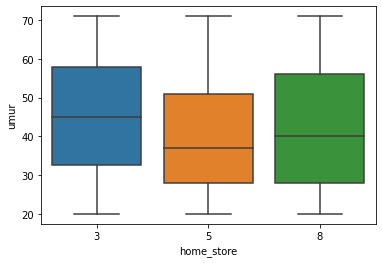

In [ ]:
sns.boxplot(data = df_cust, x ='home_store', y = 'umur')

# Case 3

Berapakah proporsi dari transaksi yang memanfaatkan promo dan tidak?

In [ ]:
df_trx.head()

,Unnamed: 0,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,0,7,2019-04-01 00:00:00,2021-07-18 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,1,11,2019-04-01 00:00:00,2021-07-18 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,2,19,2019-04-01 00:00:00,2021-07-18 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,3,32,2019-04-01 00:00:00,2021-07-18 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,4,33,2019-04-01 00:00:00,2021-07-18 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [ ]:
# Cek berapa unik transaksi
df_trx['transaction_id'].nunique()

4203

In [ ]:
df_trx_promo = df_trx[['transaction_id','promo_item_yn']]
df_trx_promo_unik = df_trx_promo.drop_duplicates()
df_trx_promo_unik

,transaction_id,promo_item_yn
0,7,N
1,11,N
2,19,N
3,32,N
4,33,N
...,...,...
49651,327,Y
49692,401,Y
49754,490,Y
49777,537,Y


In [ ]:
# Cek berapa unik transaksi
df_trx_promo_unik['transaction_id'].nunique()

4203

> karena jumlah unik transaction_id = 4203 sedangkan jumlah baris data df_trx_promo_unik = 4443 maka di dalam 1x transaksi bisa menggunakan lebih dari satu promo dan promo digunakan pada produk bukan hanya pada transaksi.

In [ ]:
# melakukan recoding Y dan N menjadi 1 dan 0
df_trx_promo_unik['pemakaian promo'] = df_trx_promo_unik['promo_item_yn'].replace(['Y','N'], [1,0])
df_trx_promo_unik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,transaction_id,promo_item_yn,pemakaian promo
0,7,N,0
1,11,N,0
2,19,N,0
3,32,N,0
4,33,N,0
...,...,...,...
49651,327,Y,1
49692,401,Y,1
49754,490,Y,1
49777,537,Y,1


In [ ]:
# Apabila setiap transaksi menggunakan minimal 1 promo maka transaksi tersebut dianggap menggunakan promo
# Mencari max dari pemakaian_promo dari setiap customer
df_trx_promo_unik2 = df_trx_promo_unik.groupby('transaction_id')['pemakaian promo'].max().reset_index()
df_trx_promo_unik2

,transaction_id,pemakaian promo
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
4198,4199,0
4199,4200,0
4200,4201,0
4201,4202,0


> jumlah baris = 4203 sudah sama dengan jumlah unik transaction_id = 4203

In [ ]:
# me-recoding ulang 1 dan 0 menjadi Y dan N
df_trx_promo_unik2['pemakaian promo'] = df_trx_promo_unik2['pemakaian promo'].replace([1,0], ['Y','N'])
df_trx_promo_unik2

,transaction_id,pemakaian promo
0,1,Y
1,2,N
2,3,N
3,4,N
4,5,Y
...,...,...
4198,4199,N
4199,4200,N
4200,4201,N
4201,4202,N


In [ ]:
# menghitung jumlah transaksi berdasarkan pemakaian promo
df_group_cust = df_trx_promo_unik2.groupby('pemakaian promo')['transaction_id'].count()
df_group_cust

pemakaian promo
N    3963
Y     240
Name: transaction_id, dtype: int64

In [ ]:
# mencari proporsi
df_group_cust2 = (df_group_cust/df_group_cust.sum()).reset_index()
df_group_cust2.rename(columns = {'transaction_id': 'promo_pct'}, inplace = True)
df_group_cust2

,pemakaian promo,promo_pct
0,N,0.942898
1,Y,0.057102


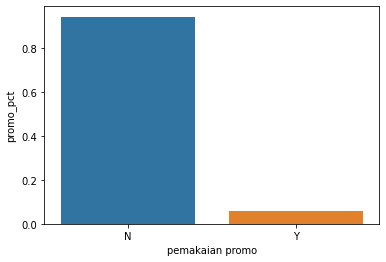

In [ ]:
# Plot
sns.barplot(data = df_group_cust2, x = 'pemakaian promo', y = 'promo_pct')

# Case 4

Distribusi quantity dari transaksi di masing-masing home store

In [ ]:
# Cek tipe data transaksi
df_trx.dtypes

Unnamed: 0            int64
transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

In [ ]:
# Ubah tipe data transaksi
# Mengubah integer menjadi string
change_columns_trx = ['transaction_id','sales_outlet_id','staff_id','customer_id','product_id','line_item_id']
for cc in change_columns_trx :
  df_trx[cc] = df_trx[cc].astype(str)
# Mengubah string menjadi datetime
change_columns_trx = ['transaction_date','transaction_time']
for cc in change_columns_trx :
  df_trx[cc] = pd.to_datetime(df_trx[cc])

In [ ]:
# Cek tipe data transaksi
df_trx.dtypes

Unnamed: 0                   int64
transaction_id              object
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
sales_outlet_id             object
staff_id                    object
customer_id                 object
instore_yn                  object
order                        int64
line_item_id                object
product_id                  object
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object

In [ ]:
# Langkah 1:Merging.. Left Join.. 
df_trx_percust = pd.merge(df_trx, df_cust, left_on = 'customer_id', right_on = 'customer_id', how = 'left')
df_trx_percust

,Unnamed: 0_x,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Unnamed: 0_y,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur,umur
0,0,7,2019-04-01,2021-07-18 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,557.0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,14023.0,38.0
1,1,11,2019-04-01,2021-07-18 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,780.0,3,Luke Patel,Herrod@Maecenas.us,2018-11-02,653-218-9979,1991-07-29,N,1991,10947.0,29.0
2,2,19,2019-04-01,2021-07-18 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,787.0,3,Hilel Ballard,Rajah@risus.org,2018-12-30,263-826-9026,1995-02-23,N,1995,9642.0,26.0
3,3,32,2019-04-01,2021-07-18 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,682.0,3,Zephr Zimmerman,Dacey@in.net,2019-03-04,741-320-7166,1999-02-06,F,1999,8198.0,22.0
4,4,33,2019-04-01,2021-07-18 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,98.0,3,Orlando Shields,Ivory@scelerisque.us,2017-10-01,747-164-4596,1967-01-29,M,1967,19894.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,49889,753,2019-04-29,2021-07-18 16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
49890,49890,756,2019-04-29,2021-07-18 16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N,2156.0,8,Malcolm,Cedric@neque.us,2019-01-08,193-832-1350,1953-09-16,M,1953,24777.0,67.0
49891,49891,759,2019-04-29,2021-07-18 11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
49892,49892,763,2019-04-29,2021-07-18 15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N,1774.0,8,Deirdre,Austin@Nullam.edu,2018-08-23,383-091-4412,1994-01-10,F,1994,10051.0,27.0


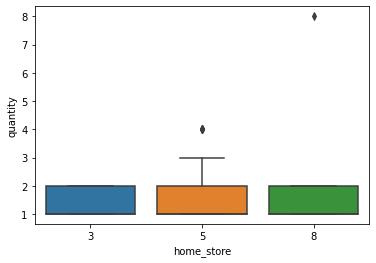

In [ ]:
sns.boxplot(data = df_trx_percust, x ='home_store', y = 'quantity')